In [45]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy import optimize
import math
%matplotlib inline 

In [46]:
data = sio.loadmat('data/ex3data1.mat')

In [47]:
X = data['X']
y = data['y']
m, _ = X.shape
input_layer_size  = 400  # 20x20 Input Images of Digits
num_labels = 10  

In [48]:
# Randomly select 100 data points to display
rand_indices = np.random.permutation(range(m))
sel = X[rand_indices[0:100], :]

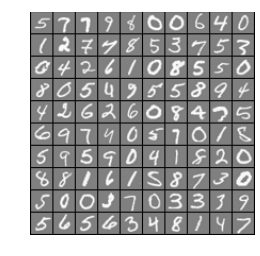

In [49]:
from displayData import displayData
displayData(sel)

Training One-vs-All Logistic Regression...

In [50]:
Lambda = 0.1

In [51]:
def sigmoid(z):
    return 1 / (1 + math.e ** -z)

In [110]:
def lrCostFunction(theta, X, y, Lambda):
    H = sigmoid(X.dot(theta))
    T = (-y* np.log(H)) - (1 - y) * (np.log(1 - H))
    J = np.sum(T) / len(y) + Lambda / (2 * len(y)) * np.sum(theta[1:] ** 2)
    return J

In [111]:
def oneVsAll(X, y, num_labels, Lambda):
    X = np.column_stack((np.ones((X.shape[0],1)),X))
    all_theta = np.zeros((num_labels, X.shape[1]))
    for i in range(1,10):
        initial_theta = np.zeros(X.shape[1],)
        options = {'full_output': True, 'maxiter': 50}
        theta, _, _, _, _ = optimize.fmin_bfgs(lrCostFunction, initial_theta, args=(X,y,Lambda))
        all_theta[i] = theta
        print i
    return all_theta

In [112]:
%timeit all_theta = oneVsAll(X, y, num_labels, Lambda)

KeyboardInterrupt: 

In [ ]:
all_theta.shape

In [ ]:
def predictOneVsAll(all_theta, X):
    X = np.column_stack((np.ones((X.shape[0],1)),X))
    C = sigmoid(X.dot(all_theta.T))
    print X.shape
    print C.shape
    print np.max(C) * 2

In [ ]:
pred = predictOneVsAll(all_theta, X)

In [ ]:
all_theta[:,30]